# Colors for SNLS

- Author Sylvie Dagoret-Campagne
- date March 23rd 2018
- update March 23rd 2018



In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
cmap = cm.jet
%matplotlib inline

In [17]:
import os
import sys

In [18]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [19]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [20]:
cfht_transmissionfile="./all_SNLS_transm.csv"

In [21]:
sys.path.append('./snlsphotometry')
sys.path.append('../DESCDec2017/pysynphotsed')

In [22]:
!ls ../DESCDEC2017

ls: cannot access ../DESCDEC2017: No such file or directory


In [23]:
import libSNLSPhotometry as photo
import libCFHTFilters as cfht
import libpysynphotsed as sed

In [24]:
import astropy
import astropy.units as u
from astropy.io import fits

In [25]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

# CFHT Telescope

In [26]:
CFHT_COLL_SURF=np.pi/4.*(3.6*u.m)**2/(u.cm)**2  # LSST collectif surface
WLMIN=3000.
WLMAX=11000.

In [27]:
NBINS=100000
BinWidth=(WLMAX-WLMIN)/float(NBINS)
WL=np.linspace(WLMIN,WLMAX,NBINS)

In [28]:
CFHT_COLL_SURF.decompose()

<Quantity 101787.6019763093>

In [29]:
S.refs.setref(area=CFHT_COLL_SURF.decompose(), waveset=None)

In [30]:
S.refs.set_default_waveset(minwave=3000, maxwave=11000, num=8000, delta=1, log=False)

In [31]:
S.refs.showref()

thermtable: /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
   waveset: Min: 3000, Max: 11000, Num: None, Delta: 1, Log: False
 comptable: /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
graphtable: /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
      area: 101787.601976


# Number of independant catalog

In [32]:
all_sed_collection= []
all_sedmodels_tag=[]

In [33]:
Flag_CALSPEC_HD=False
Flag_BC95=False
Flag_THERMALBB=True
Flag_PHOENIX=True
Flag_CK04=False
Flag_PICKLE=False
Flag_K93=False
Flag_BK=False
Flag_BPGS=False
    
if Flag_CALSPEC_HD:
    all_sed=sed.get_all_calspec_hd()
    all_sed_collection.append(all_sed)
    all_sedmodels_tag.append('calspec hd')
            
if Flag_BC95:
    all_sed=sed.get_many_bc95()
    all_sed_collection.append(all_sed)
    all_sedmodels_tag.append('bc95')
      
if Flag_THERMALBB:
    all_sed=sed.get_all_thermalbb_flatT()
    all_sed_collection.append(all_sed)
    all_sedmodels_tag.append('Blackbody')
    
if Flag_PHOENIX:
    all_sed=sed.get_all_phoenix()
    all_sed_collection.append(all_sed)
    all_sedmodels_tag.append('phoenix')
        
if Flag_CK04:
    all_sed=sed.get_many_ck04models()
    all_sed_collection.append(all_sed)
    all_sedmodels_tag.append('ck04')
        
if Flag_PICKLE:  
    all_sed=sed.get_all_pickle()
    all_sed_collection.append(all_sed)
    all_sedmodels_tag.append('pickle')
        
if Flag_K93:
    all_sed=sed.get_many_k93model()
    all_sed_collection.append(all_sed)
    all_sedmodels_tag.append('k93')
        
if Flag_BK:
    all_sed=sed.get_many_bkmodels()
    all_sed_collection.append(all_sed)
    all_sedmodels_tag.append('bk') 
        
if Flag_BPGS:    
    all_sed=sed.get_many_bpgs()
    all_sed_collection.append(all_sed)
    all_sedmodels_tag.append('bpgs') 


phoenix star : T= 6200.0  metal= -0.0
phoenix star : T= 25000.0  metal= -0.0
phoenix star : T= 10200.0  metal= -0.5
phoenix star : T= 37000.0  metal= -1.0
phoenix star : T= 3600.0  metal= -1.0
phoenix star : T= 11000.0  metal= -1.5
phoenix star : T= 9200.0  metal= -2.0
phoenix star : T= 2800.0  metal= -2.0
phoenix star : T= 4200.0  metal= -2.5
phoenix star : T= 29000.0  metal= -3.0
phoenix star : T= 3800.0  metal= -3.5
phoenix star : T= 16500.0  metal= -3.5
phoenix star : T= 6300.0  metal= -4.0
phoenix star : T= 4300.0  metal= 0.3
phoenix star : T= 39000.0  metal= 0.3
phoenix star : T= 7800.0  metal= 0.5


In [34]:
NBCATALOGS=len(all_sedmodels_tag)

In [35]:
NBCATALOGS

2

# Retrieve Filters

In [36]:
bp_u,bp_g,bp_r,bp_i,bp_z=cfht.GetAllCFHTBands(cfht_transmissionfile)

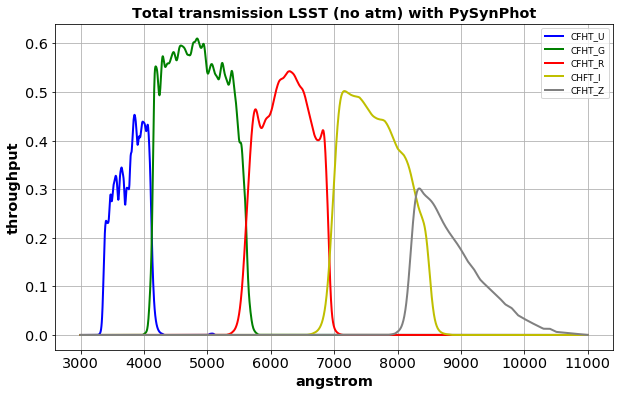

In [37]:
cfht.PlotAllCFHTBands(bp_u,bp_g,bp_r,bp_i,bp_z)

# Create LSST Detector

In [38]:
cfhtdetector=photo.SNLSTransmission('cfhtel')

In [39]:
cfhtdetector.fill_det_allbands([bp_u,bp_g,bp_r,bp_i,bp_z])

# Get CFHT Atmosphere

In [40]:
photo_atm=photo.Atmosphere('SNLS atmosphere')

In [41]:
df=pd.read_csv(cfht_transmissionfile)
df.sort_index(axis=0,ascending=True,inplace=True)     
wl_atm=df["lambda"]
tr_atm=df["atm"]
wl_atm=np.array(wl_atm)   
tr_atm=np.array(tr_atm)
photo_atm.fill_array(wl_atm)        
photo_atm.fill_array(tr_atm)  

In [42]:
theatmosph=photo_atm.get_array()

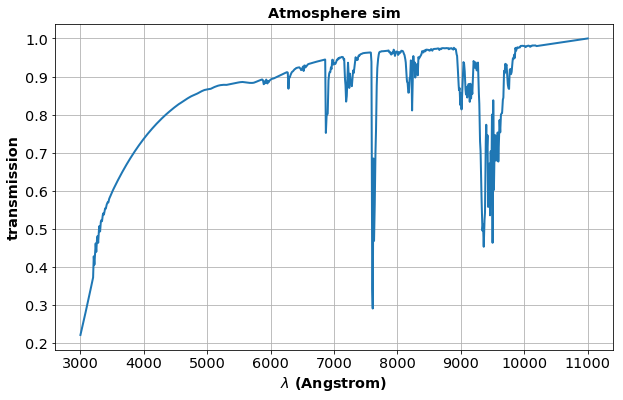

In [43]:
photo_atm.plot_pys_bp()

In [44]:
all_bp_atm=photo_atm.get_pys_pb()

In [45]:
cfhtdetector.fill_atm_allevents(all_bp_atm)

In [46]:
all_transmissions=cfhtdetector.make_transmissions()

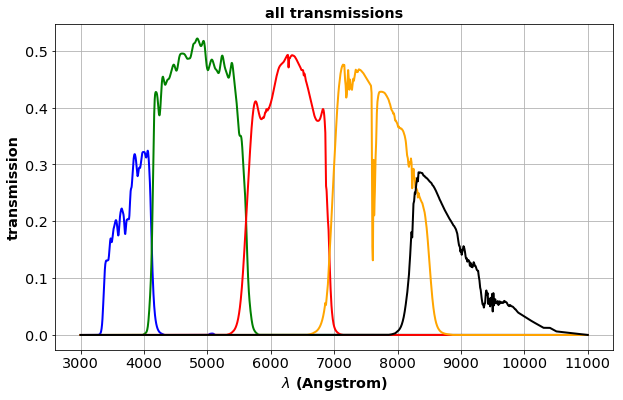

In [47]:
cfhtdetector.plot_transmissions()

# Calculation of all Observations for each SED colors

In [48]:
all_observations_collection = []
all_observations_zeropt_collection = []

In [49]:
np.arange(NBCATALOGS)

array([0, 1])

In [50]:
for id_model in np.arange(NBCATALOGS):
    the_obs_name="SNLS_models-{}".format(all_sedmodels_tag[id_model])  
    print id_model, the_obs_name
    the_observation=photo.SNLSObservation(the_obs_name)            # create a set of observation 
    the_observation.fill_sed(all_sed_collection[id_model])         # get the SED from the SED model model
    the_observation.fill_transmission(all_transmissions)           # provide LSST Trroughput transmission
    the_observation.make_observations()                            # start calculations 
    the_observation.make_samplobservations()
    the_observation.compute_counts()
    the_observation.compute_magnitude()
    the_observation.compute_colors()
    all_observations_collection.append(the_observation)

0 SNLS_models-Blackbody
((ATM_1 * CFHT_U)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((ATM_1 * CFHT_G)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((ATM_1 * CFHT_R)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((ATM_1 * CHFT_I)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((ATM_1 * CFHT_Z)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((ATM_1 * CFHT_U)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((ATM_1 * CFHT_G)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((ATM_1 * CFHT_R)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


libSNLSPhotometry.py:87: RuntimeWarning: divide by zero encountered in log10
  m=np.where(countrate>0,-2.5*np.log10(countrate*dt),0 )        # the magnitude
libSNLSPhotometry.py:88: RuntimeWarning: divide by zero encountered in divide
  dm=np.where(countrate>0,-2.5/2.3/np.sqrt(countrate*dt),0)     # the error on magnitude


# Check

In [51]:
len(all_observations_collection)

2

In [52]:
ModelSelect=0
ObjectSelect=0

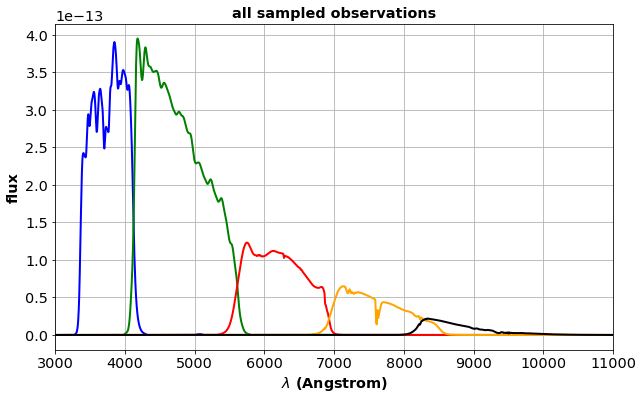

In [53]:
all_observations_collection[ModelSelect].plot_samplobservations(ObjectSelect)

In [54]:
all_colors=all_observations_collection[ModelSelect].get_colors()

In [55]:
all_colors.shape

(100, 1, 4)

100 100
1562 1562


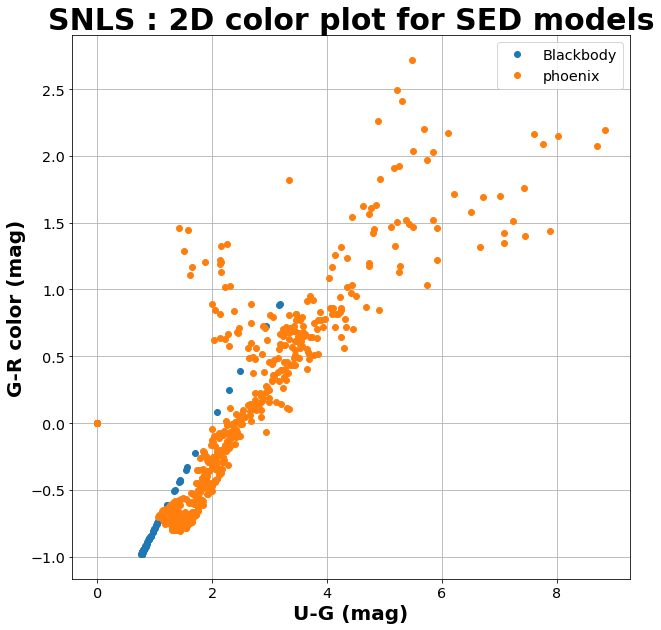

In [56]:
plt.figure(figsize=(10,10))
for id_model in np.arange(NBCATALOGS):
    all_colors=all_observations_collection[id_model].get_colors()
    c1=all_colors[:,0,0]
    c2=all_colors[:,0,1]
    print len(c1),len(c2)
    plt.plot(c1,c2,'o',label=all_sedmodels_tag[id_model])
    
plt.grid()

xtitle='U-G (mag)'
ytitle='G-R color (mag)'
title='SNLS : 2D color plot for SED models'
plt.xlabel(xtitle,fontsize=20,weight='bold')
plt.ylabel(ytitle,fontsize=20,weight='bold')        
plt.title(title,fontsize=30,weight='bold')    
plt.legend()    
    

In [57]:
id_phoenix_model=1
all_colors=all_observations_collection[id_phoenix_model].get_colors()
c1=all_colors[:,0,0]
c2=all_colors[:,0,1]
c3=all_colors[:,0,2]
c4=all_colors[:,0,3]

In [58]:
df=pd.DataFrame({'u-g':c1,'g-r':c2,'r-i':c3,'i-z':c4})

In [60]:
df = df.reindex_axis(['u-g','g-r','r-i','i-z'], axis=1)
#df = df.reindex(['u-g','g-r','r-i','i-z'], axis=1)

In [62]:
df.head()

,u-g,g-r,r-i,i-z
0,2.132693,-0.201700,-0.103528,-0.977641
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,3.008759,0.809511,2.231369,0.179941
4,0.000000,0.000000,0.000000,0.000000


In [63]:
df.to_csv("phoenix_snlsmag.csv")

In [ ]:
df[(df['u-g']==0 and df['g-r']==0 and df['r-i']  and ['g-r']) ]

In [ ]:
df

In [ ]:
df1=df["u-g"]

In [ ]:
df1=df1[df1>0]

In [ ]:
df1.plot.hist(by=['u-g'],bins=50)